<a href="https://colab.research.google.com/github/lisatwyw/data-gym/blob/master/biosppy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oveview #

Exploring the [```biosppy```](https://github.com/PIA-Group/BioSPPy) preprocessing toolkit



## A) Mount and create subfolder ```MUSE```##

In [32]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## B) Install biosppy  ##


In [4]:
! pip install biosppy

from biosppy import storage
from biosppy.signals import ecg

     |████████████████████████████████| 81kB 2.4MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## C) Download sample ##

In [0]:
! wget -O biosppy_ecg.txt https://github.com/PIA-Group/BioSPPy/raw/master/examples/ecg.txt

## D) Runs ```ecg``` ##

This function returns:

    ts (array) – Signal time axis reference (seconds).
    filtered (array) – Filtered ECG signal.
    rpeaks (array) – R-peak location indices.
    templates_ts (array) – Templates time axis reference (seconds).
    templates (array) – Extracted heartbeat templates.
    heart_rate_ts (array) – Heart rate time axis reference (seconds).
    heart_rate (array) – Instantaneous heart rate (bpm).


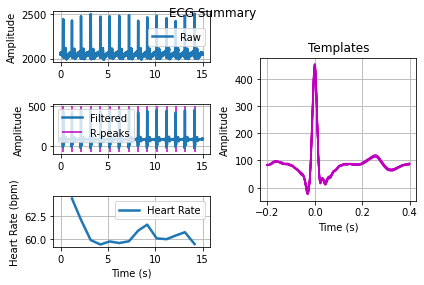

In [24]:
signal, mdata = storage.load_txt('biosppy_ecg.txt')
out = ecg.ecg(signal=signal, sampling_rate=1000., show=True)

In [0]:
out = ecg.ecg(signal=signal, sampling_rate=1000., show=True)

## E) Apply ECG preprocessing using data in ```MUSE``` subfolder (already downloaded) ##

In [33]:
import pandas as pd
import glob
import os

os.chdir('/content/gdrive/My Drive/Colab Notebooks/opensource_datasets/MUSE')
 
files = glob.glob('ECGDataDenoised/*csv') 
len(files)
df = pd.read_csv(files[0])
print('Leads:', df.keys())


Leads: Index(['45.607', '116.11', '59.548', '-79.862', '-7.1287', '90.361', '-275.89',
       '-302.23', '-80.226', '-29.349', '3.8533', '40.351'],
      dtype='object')


In [11]:
df2.keys()

Index(['-12.019', '-90.004', '-76.989', '50.127', '33.486', '-82.1', '99.943',
       '183.34', '359.12', '309.55', '19.959', '-173.51'],
      dtype='object')

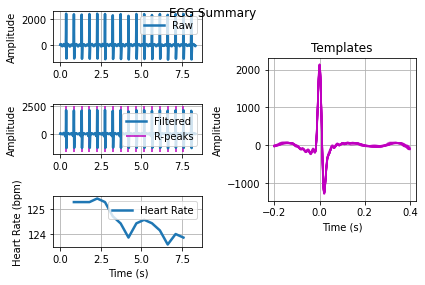

In [12]:
df2 = pd.read_csv(files[-1])

signal3=df2['19.959']
out3 = ecg.ecg(signal=signal3, sampling_rate=600., show=True)

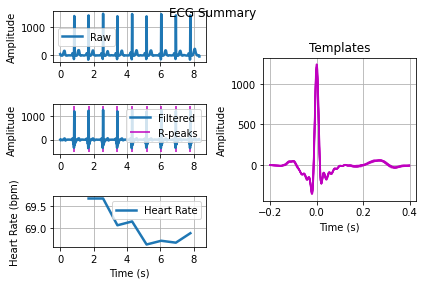

In [8]:
signal2=df['45.607']
out2 = ecg.ecg(signal=signal2, sampling_rate=600., show=True)


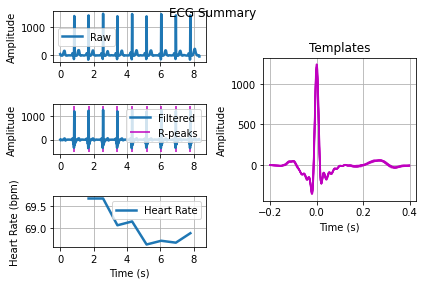

In [9]:
signal2b=signal2

fs=1200.0
out2b = ecg.ecg(signal=signal2b, sampling_rate=fs/2, show=True)


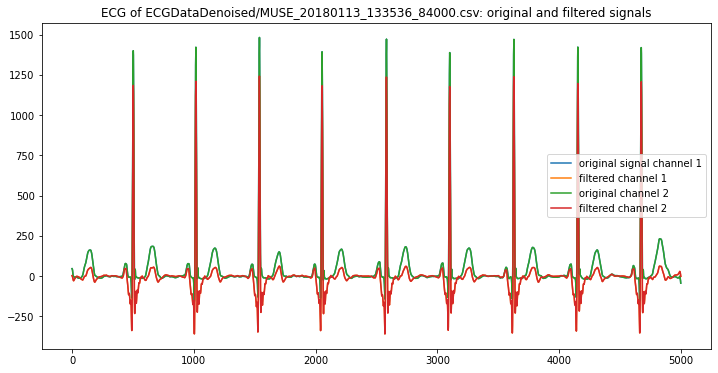

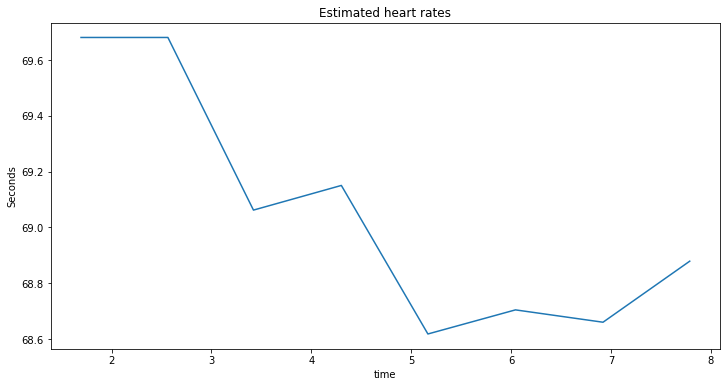

In [20]:
signal2.shape

import matplotlib.pyplot as plt

import numpy as np
W=12
H=6
fig, ax = plt.subplots( figsize=(W,H))

out2['ts']
plt.plot( signal2, label='original signal channel 1')
plt.plot( out2['filtered'], label='filtered channel 1')

plt.plot( signal2b, label='original channel 2')
plt.plot( out2b['filtered'], label='filtered channel 2')
plt.title('ECG of %s: original and filtered signals' % files[0]);
plt.legend()

fig, ax = plt.subplots( figsize=(W,H))
plt.plot( out2b['heart_rate_ts'], out2b['heart_rate'], label='Heart rates B')
plt.ylabel('Seconds')
plt.title('Estimated heart rates')

plt.xlabel('time');

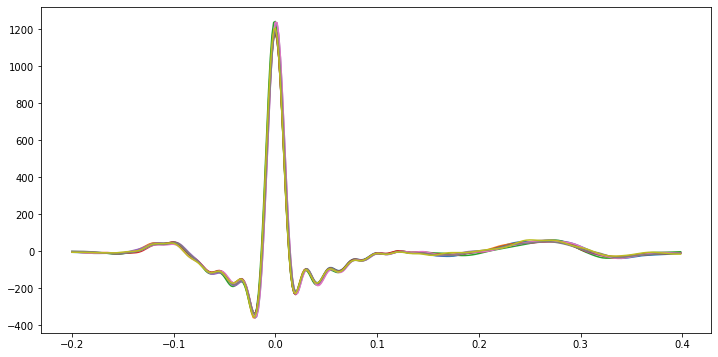

In [14]:
fig, ax = plt.subplots( figsize=(W,H))
for a in range( out2b['templates'].shape[0]):
  plt.plot(out2b['templates_ts'], out2b['templates'][a,:], label ='template %d' % a)

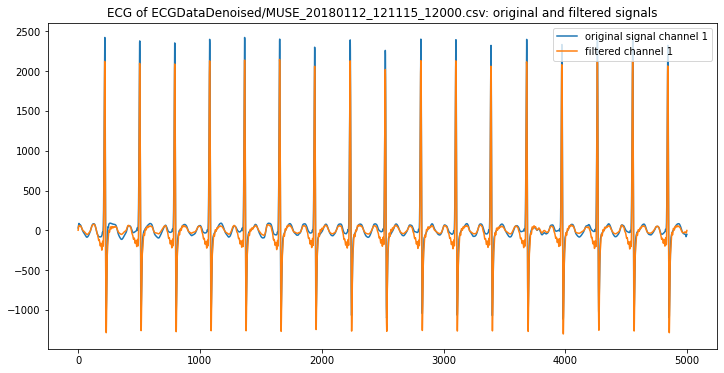

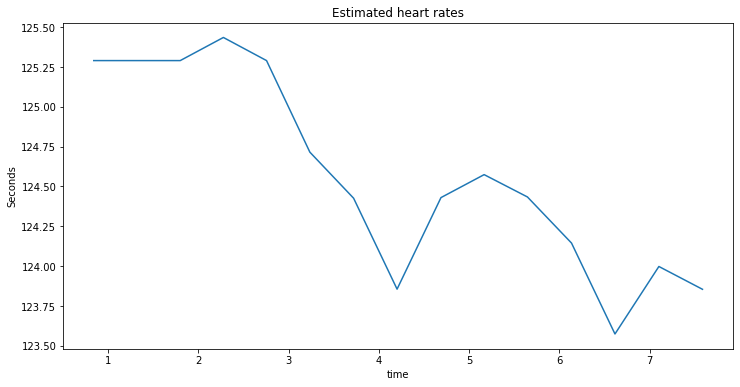

In [22]:
W=12
H=6
fig, ax = plt.subplots( figsize=(W,H))

out2['ts']
plt.plot( signal3, label='original signal channel 1')
plt.plot( out3['filtered'], label='filtered channel 1')

plt.title('ECG of %s: original and filtered signals' % files[-1]);
plt.legend()

fig, ax = plt.subplots( figsize=(W,H))
plt.plot( out3['heart_rate_ts'], out3['heart_rate'], label='Heart rates B')
plt.ylabel('Seconds')
plt.title('Estimated heart rates')

plt.xlabel('time');

In [25]:
print( signal.shape, signal3.shape, signal2.shape )


(15000,) (4999,) (4999,)


In [26]:
df3 = pd.read_csv(files[10])
df3.shape

(4999, 12)